In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import pdist
from matplotlib import cm
import pickle
import sys
import os
file_path = 'C:/Users/dB/deBivort/projects/ALVariability/'
proj_dir = os.path.join(file_path.split('ALVariability')[0], 'ALVariability')
sys.path.append(proj_dir)
from utils.plot_utils import set_font_sizes
from utils.data_utils import make_df_AL_activity_long, make_orn_upn_frs, make_glomerular_odor_responses
set_font_sizes()

In [2]:
project_dir = os.path.join(file_path.split('ALVariability')[0], 'ALVariability')
df_neur_ids = pd.read_csv(os.path.join(project_dir, 'connectomics/hemibrain_v1_2/df_neur_ids.csv'), index_col=0)
al_block = pd.read_csv(os.path.join(project_dir, 'connectomics/hemibrain_v1_2/AL_block.csv'), index_col=0)
al_block.columns = al_block.columns.astype(np.int64)
al_block.index = al_block.index.astype(np.int64)
imput_table = pd.read_csv(os.path.join(project_dir, 'odor_imputation/df_odor_door_all_odors_imput_ALS.csv'), index_col=0)

In [3]:
d_sims_fpath = '../run_model/save_sims_resampling_ORNs_LNs_PNs/d_sims_res_df_AL_activities_2021_5_20-12_9_35.p'
d_sims = pickle.load(open(d_sims_fpath, 'rb'))

In [4]:
sim_dirs = list(d_sims.keys())
sim_dirs[:5]

['2021_5_19-19_58_41__0v12_all0.1_ecol0.4_icol0.2_pcol4_resample_LN_umPN__19_58_41',
 '2021_5_19-20_20_59__0v12_all0.1_ecol0.4_icol0.2_pcol4_resample_ORN_LN__20_20_59',
 '2021_5_19-3_38_5__0v12_all0.1_ecol0.4_icol0.2_pcol4_resample_ORN_LN_umPN__3_38_5',
 '2021_5_19-3_19_55__0v12_all0.1_ecol0.4_icol0.2_pcol4_resample_LN__3_19_55',
 '2021_5_19-3_37_12__0v12_all0.1_ecol0.4_icol0.2_pcol4_resample_umPN__3_37_12']

In [5]:
len(sim_dirs)

998

In [6]:
orn_set = [f for f in sim_dirs if 'resample_ORN__' in f]
ln_set = [f for f in sim_dirs if 'resample_LN__' in f]
pn_set = [f for f in sim_dirs if 'resample_umPN__' in f]

ln_pn_set = [f for f in sim_dirs if 'resample_LN_umPN__' in f]
orn_pn_set = [f for f in sim_dirs if 'resample_ORN_umPN__' in f]
orn_ln_set = [f for f in sim_dirs if 'resample_ORN_LN__' in f]

none_set = [f for f in sim_dirs if 'resample__' in f]
all_set = [f for f in sim_dirs if 'resample_ORN_LN_umPN__' in f]


list_of_sets = [none_set, orn_set, ln_set, pn_set, 
                ln_pn_set, orn_pn_set, orn_ln_set, all_set]
#list_of_sets = [none_set, orn_set, ln_set, pn_set, all_set]

set_names = ['No resampling', '+ ORN', '+ LN', '+ PN',
             '+ LN + PN', '+ ORN + PN', '+ ORN + LN',
             '+ ORN + LN + PN']
#set_names = ['no resampling', '+ ORN', '+ LN', '+ PN', '+ ORN + LN + PN']


all_sims = np.concatenate(list_of_sets)
all_sims_short_names = np.concatenate([[set_names[i]]*len(list_of_sets[i]) for i in range(len(list_of_sets))])

In [7]:
master_fig_dir = os.path.join(os.curdir, 'figs')
if not os.path.exists(master_fig_dir):
    os.makedirs(master_fig_dir)
resampling_fig_dir = os.path.join(master_fig_dir, 'resample_ORNs_LNs_PNs_plots')
if not os.path.exists(resampling_fig_dir):
    os.makedirs(resampling_fig_dir)

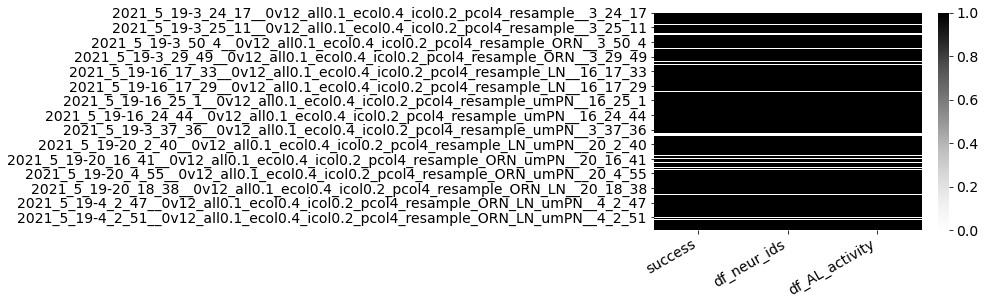

In [8]:
sim_info_fields = np.array(['success', 'df_neur_ids', 'df_AL_activity'])
success_pos = np.where(sim_info_fields == 'success')[0][0]

df_sim_info = []
for i in range(len(all_sims)):
    s = all_sims[i]
    sim_keys = list(d_sims[s].keys())
    present_keys = [f in sim_keys for f in sim_info_fields]
    present_keys[success_pos] = d_sims[s]['success']
    #r = pd.Series(present_keys, name=all_sims_short_names[i]).T
    r = pd.Series(present_keys, name=s).T
    df_sim_info.append(r)
df_sim_info = pd.concat(df_sim_info, 1).T
df_sim_info.columns = sim_info_fields
df_sim_info = df_sim_info.astype(int)

plt.figure()
sns.heatmap(df_sim_info, cmap='Greys')
plt.xticks(rotation=30, ha='right')
plt.show()

In [9]:
df_sim_info.iloc[:5]

,success,df_neur_ids,df_AL_activity
2021_5_19-3_24_17__0v12_all0.1_ecol0.4_icol0.2_pcol4_resample__3_24_17,1,1,1
2021_5_19-3_46_20__0v12_all0.1_ecol0.4_icol0.2_pcol4_resample__3_46_20,1,1,1
2021_5_19-3_23_52__0v12_all0.1_ecol0.4_icol0.2_pcol4_resample__3_23_52,0,0,0
2021_5_19-3_26_35__0v12_all0.1_ecol0.4_icol0.2_pcol4_resample__3_26_35,1,1,1
2021_5_19-3_23_22__0v12_all0.1_ecol0.4_icol0.2_pcol4_resample__3_23_22,1,1,1


In [10]:
list_of_sets_good_sims = [df_sim_info[(df_sim_info.success == 1) & 
                                      (df_sim_info.index.isin(cur_set))].index.values \
                          for cur_set in list_of_sets]
all_good_sims = np.concatenate(list_of_sets_good_sims)
all_good_sims_short_names = np.concatenate([[set_names[i]]*len(list_of_sets_good_sims[i])\
                                            for i in range(len(list_of_sets_good_sims))])

In [11]:
[len(x) for x in list_of_sets_good_sims], len(all_good_sims)

([73, 145, 149, 153, 84, 88, 98, 150], 940)

In [12]:
#df_char_ids = d_sims[good_orn_set[0]]['df_char_ids']
#hemi_gloms = df_char_ids[df_char_ids['altype'] == 'ORN']['glom'].unique()
hemi_gloms = np.array(['DA1', 'VC5', 'VA1v', 'VA1d', 'VA2', 'VA6', 'DM1', 'DL3', 'DL1',
       'VL2a', 'VM4', 'VM5d', 'DM2', 'VL1', 'DM3', 'DM4', 'DM6', 'DL4',
       'VC3l', 'DC3', 'VM7d', 'V', 'VL2p', 'VM1', 'VC3m', 'DC1', 'DL5',
       'D', 'DP1m', 'VM5v', 'DA3', 'VC4', 'DA2', 'VA7m', 'VA3', 'DP1l',
       'DC4', 'VC2', 'VA4', 'DC2', 'VM7v', 'DM5', 'DL2v', 'VM3', 'VC1',
       'VA5', 'DL2d', 'VA7l', 'DA4l', 'DA4m', 'VM2'])

thermo_hygro_glomeruli = np.array(['VP1d', 'VP1l', 'VP1m', 'VP2', 'VP3', 'VP4', 'VP5'])

## record firing rate activity during odors

In [14]:
list_of_pn_glom_tensors_good_set = []
list_of_pn_individ_tensors_good_set = []
list_of_ln_individ_tensors_good_set = []
list_of_orn_glom_tensors_good_set = []
list_of_orn_individ_tensors_good_set = []
list_of_bodyIds_by_set = []

for i in range(len(list_of_sets_good_sims)):
    good_set = list_of_sets_good_sims[i]
    print(set_names[i])
    good_set_tensor_mean_glom_pn_fr = []
    good_set_tensor_individ_pn_fr = []
    good_set_tensor_individ_ln_fr = []
    good_set_tensor_mean_glom_orn_fr = []
    good_set_tensor_individ_orn_fr = []
    good_set_bodyIds = []
    
    for k in good_set:
        d_ind_sim = d_sims[k]
        df_AL_activity = d_ind_sim['df_AL_activity']
        
        # get uPN responses
        df_upn_activity = df_AL_activity.loc[(df_AL_activity.neur_type == 'uPN') & 
                                             ~(df_AL_activity.glom.isin(thermo_hygro_glomeruli))].set_index('neur_name')
        df_upn_frs = df_upn_activity.loc[:, (df_upn_activity.columns.str.contains('dur')) | 
                                            (df_upn_activity.columns.str.contains('glom')) ]
        good_set_tensor_individ_pn_fr.append(df_upn_frs.iloc[:, :-1].values)
        df_upn_frs_mean_glom = df_upn_frs.groupby('glom').mean().loc[hemi_gloms]
        good_set_tensor_mean_glom_pn_fr.append(df_upn_frs_mean_glom.values)
        
        # get LN responses
        df_ln_activity = df_AL_activity.loc[df_AL_activity.neur_type.isin(['iLN', 'eLN'])].set_index('neur_name')
        df_ln_frs = df_ln_activity.loc[:, df_ln_activity.columns.str.contains('dur')]
        good_set_tensor_individ_ln_fr.append(df_ln_frs.values)
        
        # get ORN responses
        df_orn_activity = df_AL_activity.loc[df_AL_activity.neur_type == 'ORN'].set_index('neur_name')
        df_orn_frs = df_orn_activity.loc[:, (df_upn_activity.columns.str.contains('dur')) | 
                                            (df_upn_activity.columns.str.contains('glom')) ]
        good_set_tensor_individ_orn_fr.append(df_orn_frs.iloc[:, :-1].values)
        df_orn_frs_mean_glom = df_orn_frs.groupby('glom').mean().loc[hemi_gloms]
        good_set_tensor_mean_glom_orn_fr.append(df_orn_frs_mean_glom.values)
        
        # get bodyIds
        ind_df_neur_ids = d_ind_sim['df_neur_ids']
        good_set_bodyIds.append(ind_df_neur_ids.bodyId.values)
        
    list_of_bodyIds_by_set.append(good_set_bodyIds)
    list_of_pn_glom_tensors_good_set.append(np.stack(good_set_tensor_mean_glom_pn_fr, 0))
    list_of_pn_individ_tensors_good_set.append(np.stack(good_set_tensor_individ_pn_fr, 0))
    list_of_ln_individ_tensors_good_set.append(np.stack(good_set_tensor_individ_ln_fr, 0))
    list_of_orn_glom_tensors_good_set.append(np.stack(good_set_tensor_mean_glom_orn_fr, 0))
    list_of_orn_individ_tensors_good_set.append(np.stack(good_set_tensor_individ_orn_fr, 0))

No resampling
+ ORN
+ LN
+ PN
+ LN + PN
+ ORN + PN
+ ORN + LN
+ ORN + LN + PN


## record connectivity matrix columns

In [15]:
sim_orn_pos = np.where(ind_df_neur_ids.altype == 'ORN')[0]
sim_ln_pos = np.where(ind_df_neur_ids.altype == 'LN')[0]
sim_upn_pos = np.where((ind_df_neur_ids.altype == 'uPN') & ~(ind_df_neur_ids.glom.isin(thermo_hygro_glomeruli)))[0]
sim_mpn_pos = np.where(ind_df_neur_ids.altype == 'mPN')[0]

In [16]:
orn_input_vecs_by_set = []
ln_input_vecs_by_set = []
pn_input_vecs_by_set = []
for i in range(len(list_of_bodyIds_by_set)):
    print(set_names[i])
    cur_set = list_of_bodyIds_by_set[i]
    set_orn_input_vecs = [al_block.loc[cur_arr, cur_arr[sim_orn_pos]].sum(0).values for cur_arr in cur_set]
    orn_input_vecs_by_set.append(set_orn_input_vecs)
    set_ln_input_vecs = [al_block.loc[cur_arr, cur_arr[sim_ln_pos]].sum(0).values for cur_arr in cur_set]
    ln_input_vecs_by_set.append(set_ln_input_vecs)
    set_pn_input_vecs = [al_block.loc[cur_arr, cur_arr[sim_upn_pos]].sum(0).values for cur_arr in cur_set]
    pn_input_vecs_by_set.append(set_pn_input_vecs)
    
orn_input_vecs_by_set = np.array(orn_input_vecs_by_set)
ln_input_vecs_by_set = np.array(ln_input_vecs_by_set)    
pn_input_vecs_by_set = np.array(pn_input_vecs_by_set)

No resampling
+ ORN
+ LN
+ PN
+ LN + PN
+ ORN + PN
+ ORN + LN
+ ORN + LN + PN


C:\Users\dB\Anaconda3\envs\ALVar\lib\site-packages\ipykernel_launcher.py:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  
C:\Users\dB\Anaconda3\envs\ALVar\lib\site-packages\ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  from ipykernel import kernelapp as app
C:\Users\dB\Anaconda3\envs\ALVar\lib\site-packages\ipykernel_launcher.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant 

## compute pairwise distances

In [17]:
dist_metric = 'euclidean'

pairwise_pn_glom_by_odor_activity_dists = []
dists_to_mean_pn_glom_by_odor_activity = []
for t in list_of_pn_glom_tensors_good_set:
    nsim_in_t, nglom, nodors = t.shape
    t_flat = t.reshape((nsim_in_t, nglom*nodors))
    t_pdists = pdist(t_flat, metric=dist_metric)
    t_mean = t_flat.mean(0)
    t_dists_to_mean = np.sum((t_flat - t_mean)**2, 1) ** 0.5
    pairwise_pn_glom_by_odor_activity_dists.append(t_pdists)
    dists_to_mean_pn_glom_by_odor_activity.append(t_dists_to_mean)
    
pairwise_pn_individ_by_odor_activity_dists = []
dists_to_mean_pn_individ_by_odor_activity = []
for t in list_of_pn_individ_tensors_good_set:
    nsim_in_t, n_pns, nodors = t.shape
    t_flat = t.reshape((nsim_in_t, n_pns*nodors))
    t_pdists = pdist(t_flat, metric=dist_metric)
    t_mean = t_flat.mean(0)
    t_dists_to_mean = np.sum((t_flat - t_mean)**2, 1) ** 0.5
    pairwise_pn_individ_by_odor_activity_dists.append(t_pdists)
    dists_to_mean_pn_individ_by_odor_activity.append(t_dists_to_mean)
    
pairwise_ln_individ_by_odor_activity_dists = []
dists_to_mean_ln_individ_by_odor_activity = []
for t in list_of_ln_individ_tensors_good_set:
    nsim_in_t, n_lns, nodors = t.shape
    t_flat = t.reshape((nsim_in_t, n_lns*nodors))
    t_pdists = pdist(t_flat, metric=dist_metric)
    t_mean = t_flat.mean(0)
    t_dists_to_mean = np.sum((t_flat - t_mean)**2, 1) ** 0.5
    pairwise_ln_individ_by_odor_activity_dists.append(t_pdists)
    dists_to_mean_ln_individ_by_odor_activity.append(t_dists_to_mean)
    
pairwise_orn_glom_by_odor_activity_dists = []
dists_to_mean_orn_glom_by_odor_activity = []
for t in list_of_orn_glom_tensors_good_set:
    nsim_in_t, nglom, nodors = t.shape
    t_flat = t.reshape((nsim_in_t, nglom*nodors))
    t_pdists = pdist(t_flat, metric=dist_metric)
    t_mean = t_flat.mean(0)
    t_dists_to_mean = np.sum((t_flat - t_mean)**2, 1) ** 0.5
    pairwise_orn_glom_by_odor_activity_dists.append(t_pdists)
    dists_to_mean_orn_glom_by_odor_activity.append(t_dists_to_mean)
    
pairwise_orn_individ_by_odor_activity_dists = []
dists_to_mean_orn_individ_by_odor_activity = []
for t in list_of_orn_individ_tensors_good_set:
    nsim_in_t, n_orns, nodors = t.shape
    t_flat = t.reshape((nsim_in_t, n_orns*nodors))
    t_pdists = pdist(t_flat, metric=dist_metric)
    t_mean = t_flat.mean(0)
    t_dists_to_mean = np.sum((t_flat - t_mean)**2, 1) ** 0.5
    pairwise_orn_individ_by_odor_activity_dists.append(t_pdists)
    dists_to_mean_orn_individ_by_odor_activity.append(t_dists_to_mean)

In [18]:
### PAIRWISE DISTANCES OF Z SCORED DISTANCES

dist_metric = 'euclidean'

pairwise_Z_pn_glom_by_odor_activity_dists = []
dists_to_mean_Z_pn_glom_by_odor_activity = []
for t in list_of_pn_glom_tensors_good_set:
    nsim_in_t, nglom, nodors = t.shape
    z = t.reshape((nsim_in_t, nglom*nodors))
    z = ((z.T - z.mean(1)) / z.std(1)).T
    t_pdists = pdist(z, metric=dist_metric)
    z_mean = z.mean(0)
    z_dists_to_mean = np.sum((z - z_mean)**2, 1) ** 0.5
    pairwise_Z_pn_glom_by_odor_activity_dists.append(t_pdists)
    dists_to_mean_Z_pn_glom_by_odor_activity.append(z_dists_to_mean)
    
pairwise_Z_pn_individ_by_odor_activity_dists = []
dists_to_mean_Z_individ_glom_by_odor_activity = []
for t in list_of_pn_individ_tensors_good_set:
    nsim_in_t, n_pns, nodors = t.shape
    z = t.reshape((nsim_in_t, n_pns*nodors))
    z = ((z.T - z.mean(1)) / z.std(1)).T
    t_pdists = pdist(z, metric=dist_metric)
    z_mean = z.mean(0)
    z_dists_to_mean = np.sum((z - z_mean)**2, 1) ** 0.5
    pairwise_Z_pn_individ_by_odor_activity_dists.append(t_pdists)
    dists_to_mean_Z_individ_glom_by_odor_activity.append(z_dists_to_mean)
    
pairwise_Z_ln_individ_by_odor_activity_dists = []
dists_to_mean_Z_ln_individ_glom_by_odor_activity = []
for t in list_of_ln_individ_tensors_good_set:
    nsim_in_t, n_lns, nodors = t.shape
    z = t.reshape((nsim_in_t, n_lns*nodors))
    z = ((z.T - z.mean(1)) / z.std(1)).T
    t_pdists = pdist(z, metric=dist_metric)
    z_mean = z.mean(0)
    z_dists_to_mean = np.sum((z - z_mean)**2, 1) ** 0.5
    pairwise_Z_ln_individ_by_odor_activity_dists.append(t_pdists)
    dists_to_mean_Z_ln_individ_glom_by_odor_activity.append(z_dists_to_mean)
    
pairwise_Z_orn_glom_by_odor_activity_dists = []
dists_to_mean_Z_orn_glom_by_odor_activity = []
for t in list_of_orn_glom_tensors_good_set:
    nsim_in_t, nglom, nodors = t.shape
    z = t.reshape((nsim_in_t, nglom*nodors))
    z = ((z.T - z.mean(1)) / z.std(1)).T
    t_pdists = pdist(z, metric=dist_metric)
    z_mean = z.mean(0)
    z_dists_to_mean = np.sum((z - z_mean)**2, 1) ** 0.5
    pairwise_Z_orn_glom_by_odor_activity_dists.append(t_pdists)
    dists_to_mean_Z_orn_glom_by_odor_activity.append(z_dists_to_mean)
    
pairwise_Z_orn_individ_by_odor_activity_dists = []
dists_to_mean_Z_orn_individ_glom_by_odor_activity = []
for t in list_of_orn_individ_tensors_good_set:
    nsim_in_t, n_orns, nodors = t.shape
    z = t.reshape((nsim_in_t, n_orns*nodors))
    z = ((z.T - z.mean(1)) / z.std(1)).T
    t_pdists = pdist(z, metric=dist_metric)
    z_mean = z.mean(0)
    z_dists_to_mean = np.sum((z - z_mean)**2, 1) ** 0.5
    pairwise_Z_orn_individ_by_odor_activity_dists.append(t_pdists)
    dists_to_mean_Z_orn_individ_glom_by_odor_activity.append(z_dists_to_mean)

In [19]:
### PAIRWISE DISTANCES ON INPUT CONNECTIVITY

dist_metric = 'euclidean'


pairwise_pn_input_conmat_dists = []
dists_to_mean_pn_input_conmat = []
for t in pn_input_vecs_by_set:
    t_pdists = pdist(t, metric=dist_metric)
    t_flat = np.array(t)
    t_mean = t_flat.mean(0)
    t_dists_to_mean = np.sum((t_flat - t_mean)**2, 1) ** 0.5
    pairwise_pn_input_conmat_dists.append(t_pdists)
    dists_to_mean_pn_input_conmat.append(t_dists_to_mean)
    
pairwise_ln_input_conmat_dists = []
dists_to_mean_ln_input_conmat = []
for t in ln_input_vecs_by_set:
    t_pdists = pdist(t, metric=dist_metric)
    t_flat = np.array(t)
    t_mean = t_flat.mean(0)
    t_dists_to_mean = np.sum((t_flat - t_mean)**2, 1) ** 0.5
    pairwise_ln_input_conmat_dists.append(t_pdists)
    dists_to_mean_ln_input_conmat.append(t_dists_to_mean)
    
pairwise_orn_input_conmat_dists = []
dists_to_mean_orn_input_conmat = []
for t in orn_input_vecs_by_set:
    t_pdists = pdist(t, metric=dist_metric)
    t_flat = np.array(t)
    t_mean = t_flat.mean(0)
    t_dists_to_mean = np.sum((t_flat - t_mean)**2, 1) ** 0.5
    pairwise_orn_input_conmat_dists.append(t_pdists)
    dists_to_mean_orn_input_conmat.append(t_dists_to_mean)

In [20]:
t = list_of_pn_individ_tensors_good_set[0]
t.shape

(73, 130, 11)

In [21]:
dist_metric = 'euclidean'

pairwise_pn_input_conmat_dists = []
for t in pn_input_vecs_by_set:
    t_pdists = pdist(t, metric=dist_metric)
    pairwise_pn_input_conmat_dists.append(t_pdists)
    
pairwise_ln_input_conmat_dists = []
for t in ln_input_vecs_by_set:
    t_pdists = pdist(t, metric=dist_metric)
    pairwise_ln_input_conmat_dists.append(t_pdists)
    
pairwise_orn_input_conmat_dists = []
for t in orn_input_vecs_by_set:
    t_pdists = pdist(t, metric=dist_metric)
    pairwise_orn_input_conmat_dists.append(t_pdists)

## plot

In [57]:
def plot_dist_hists(list_of_set_dists, set_names, xlabel, suptit = '', figname = '', dopairs=True):
      
    n_sets = len(list_of_set_dists)
    
    for l in list_of_set_dists:
        l[np.isinf(l)] = 0 # np.nan
    
    min_dist = np.min([np.nanmin(x) for x in list_of_set_dists])
    max_dist = np.max([np.nanmax(x) for x in list_of_set_dists])

    b = np.linspace(min_dist, max_dist, 80)

    cmap = cm.get_cmap('jet')

    fig, axs = plt.subplots(n_sets, 1, figsize=(10,n_sets*2), sharex=True)
    plt.suptitle(suptit, size=16)
    for i in range(len(list_of_set_dists)):
        nsims = len(list_of_set_dists[i])
        if dopairs:
            nsims = int(1/2*((8*nsims+1)**0.5 + 1))
        axs[i].hist(list_of_set_dists[i], label=set_names[i], color=cmap(i/n_sets), bins=b)
        axs[i].axvline(np.mean(list_of_set_dists[i]), ls='--', c='k')
        axs[i].set_title(set_names[i]+f' ({nsims})')
    plt.subplots_adjust(hspace=0.4)
    plt.ylabel('# simulation'+dopairs*' pair'+'s')
    plt.xlabel(xlabel)
    if len(figname) > 0:
        plt.savefig(figname, dpi=400, bbox_inches='tight')
    plt.show()

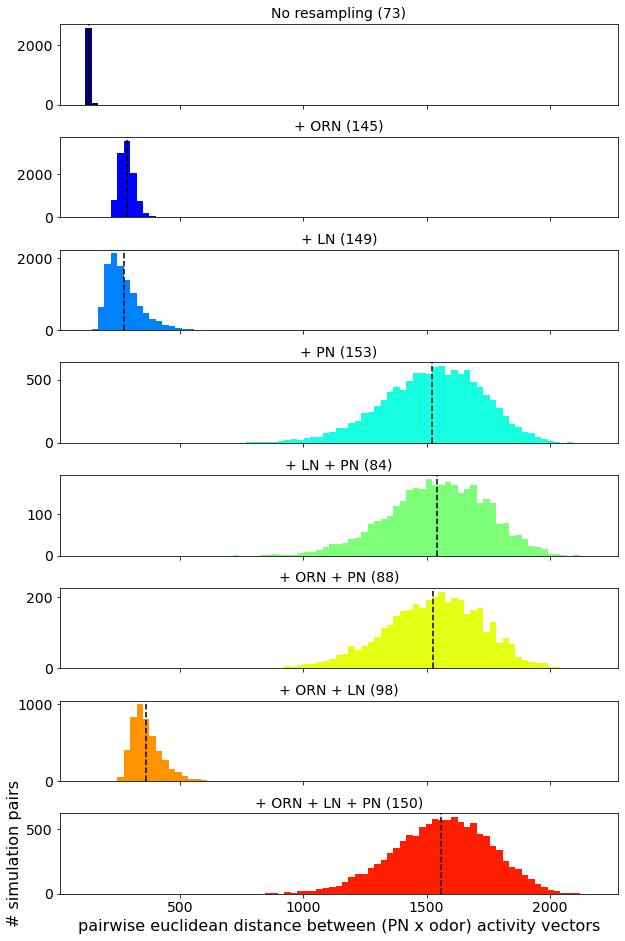

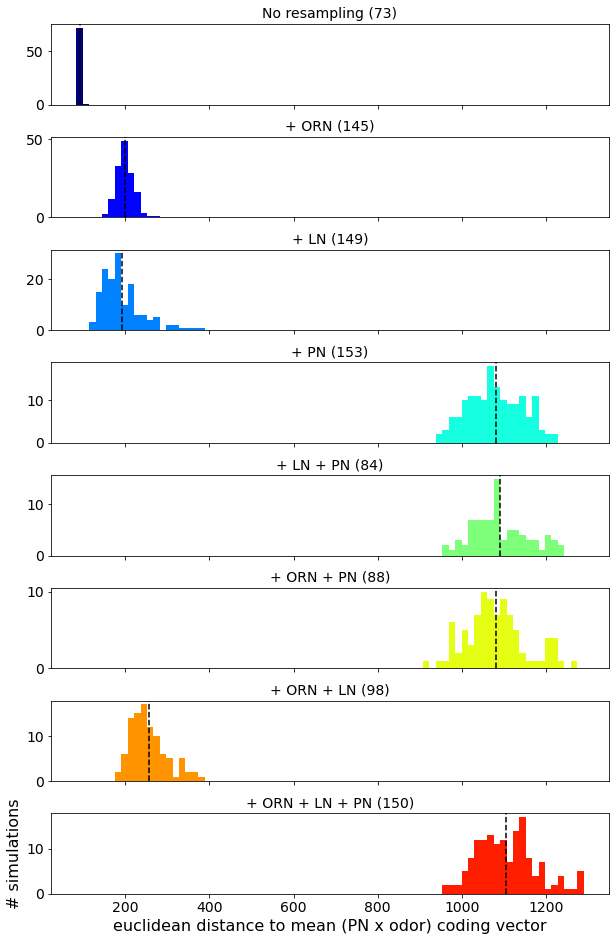

In [58]:
plot_dist_hists(pairwise_pn_individ_by_odor_activity_dists,
                set_names,
                #suptit='all x0.1 eLNs x0.4 iLNs x0.75 PNs x6',
                xlabel=f'pairwise {dist_metric} distance between (PN x odor) activity vectors',
                figname=os.path.join(resampling_fig_dir,
                                     f'pairwise_{dist_metric}_between_PN_pxo_activity_vecs_resample6.png'))

plot_dist_hists(dists_to_mean_pn_individ_by_odor_activity,
                set_names, dopairs=False,
                xlabel=f'euclidean distance to mean (PN x odor) coding vector',
                figname=os.path.join(resampling_fig_dir,
                                     f'{dist_metric}_to_mean_PN_pxo_activity_vec_resample6.png'))

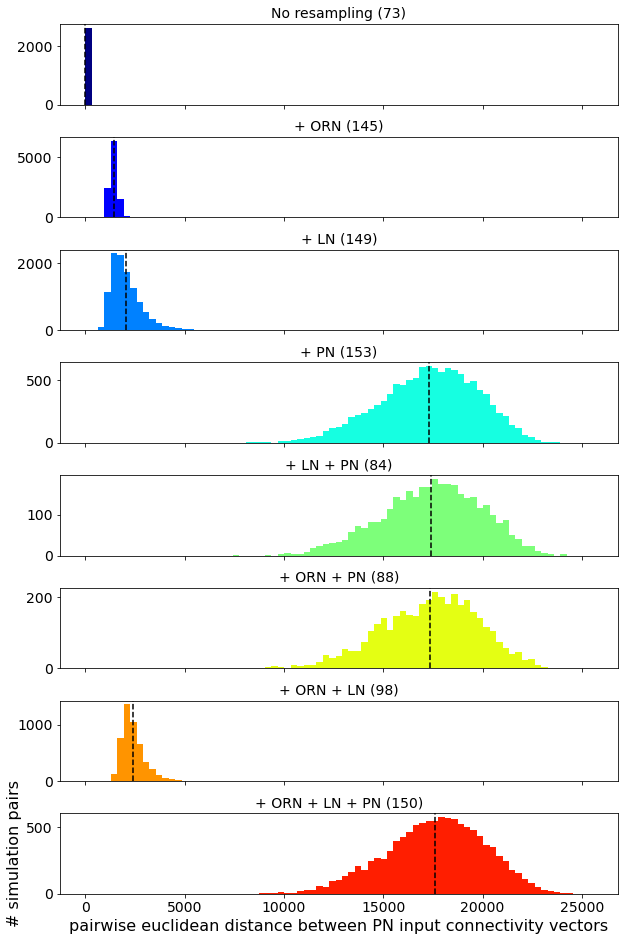

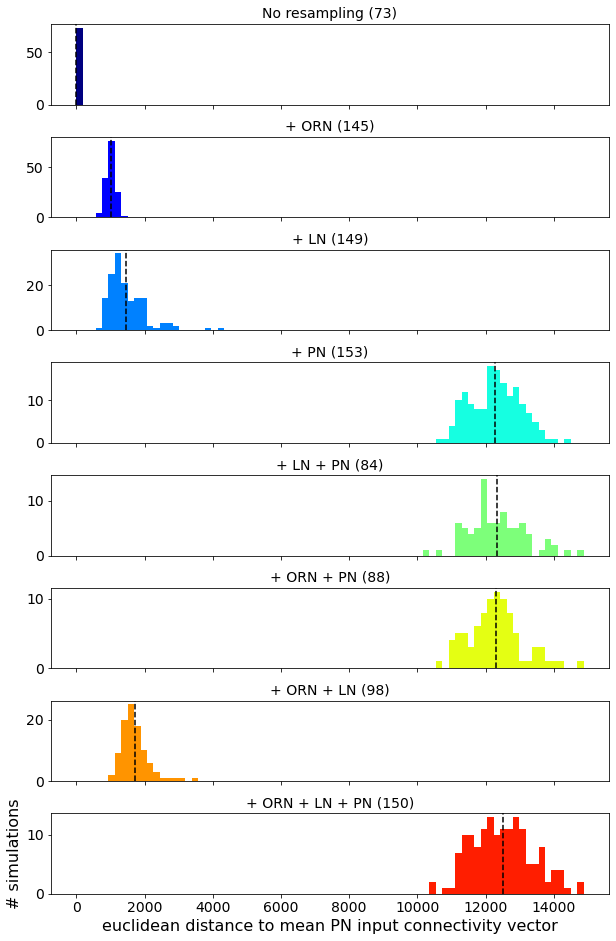

In [64]:
plot_dist_hists(pairwise_pn_input_conmat_dists,
                set_names,
                xlabel=f'pairwise {dist_metric} distance between PN input connectivity vectors',
                figname=os.path.join(resampling_fig_dir,
                                     f'pairwise_{dist_metric}_between_conmat_PN_inputs_resample6.png'))

plot_dist_hists(dists_to_mean_pn_input_conmat,
                set_names, dopairs=False,
                xlabel=f'{dist_metric} distance to mean PN input connectivity vector',
                figname=os.path.join(resampling_fig_dir,
                                     f'{dist_metric}_to_mean_conmat_PN_inputs_resample6.png'))

C:\Users\dB\Anaconda3\envs\ALVar\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


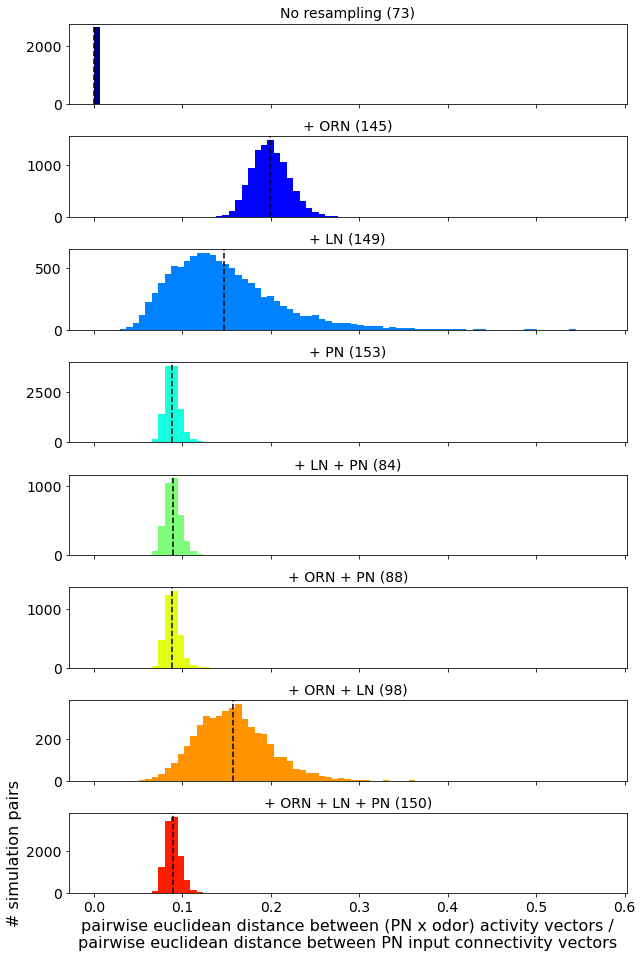

C:\Users\dB\Anaconda3\envs\ALVar\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


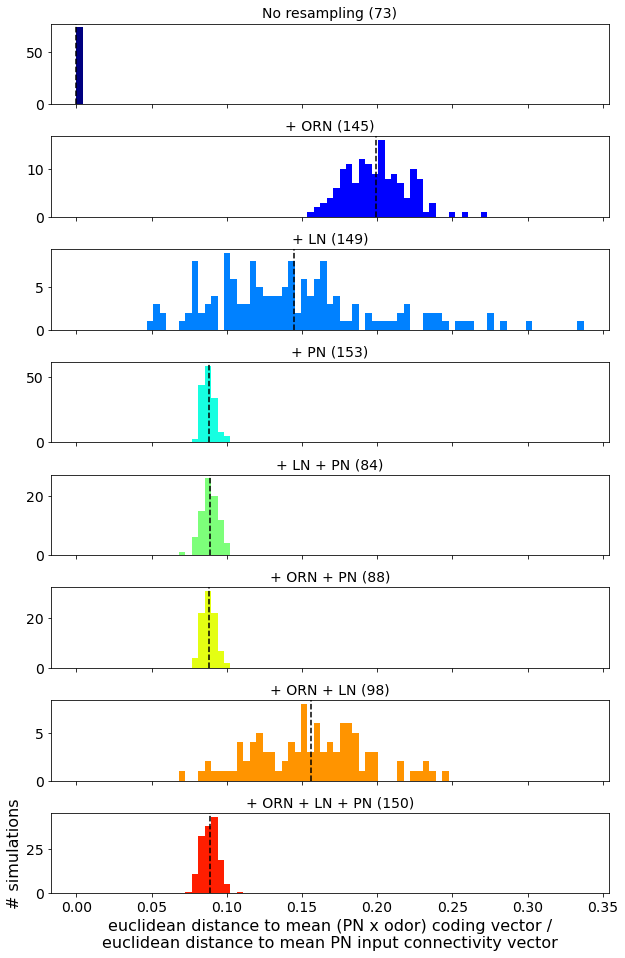

In [61]:
pn_norm_set_dists = [pairwise_pn_individ_by_odor_activity_dists[i]\
           /pairwise_pn_input_conmat_dists[i] for i in range(len(set_names))]
plot_dist_hists(pn_norm_set_dists,
                set_names,
                xlabel=f'pairwise {dist_metric} distance between (PN x odor) activity vectors /\n'+\
                    f'pairwise {dist_metric} distance between PN input connectivity vectors',
                figname=os.path.join(resampling_fig_dir,
                                     f'pairwise_{dist_metric}_between_input_conmat_normalized_PN_activity_vecs_resample6.png'))

pn_norm_set_dists_to_mean = [dists_to_mean_pn_individ_by_odor_activity[i]\
           /dists_to_mean_pn_input_conmat[i] for i in range(len(set_names))]
plot_dist_hists(pn_norm_set_dists_to_mean,
                set_names, dopairs=False,
                xlabel=f'euclidean distance to mean (PN x odor) coding vector /\n'+\
                    f'{dist_metric} distance to mean PN input connectivity vector',
                figname=os.path.join(resampling_fig_dir,
                                     f'{dist_metric}_to_mean_input_conmat_normalized_PN_activity_vec_resample6.png'))

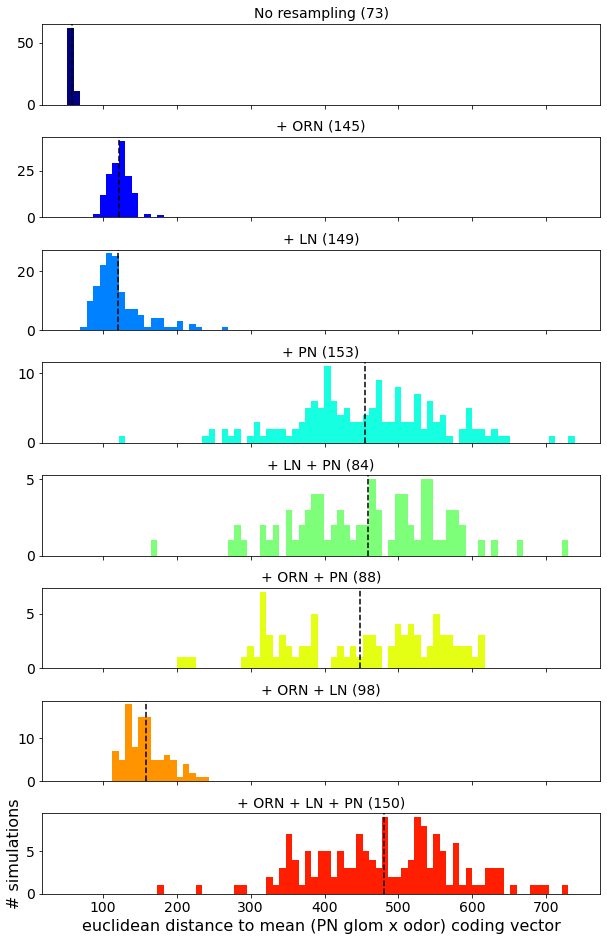

In [62]:
plot_dist_hists(dists_to_mean_pn_glom_by_odor_activity,
                set_names, dopairs=False,
                xlabel=f'euclidean distance to mean (PN glom x odor) coding vector',
                )

In [33]:
mac_odors = np.array(['3-octanol',
                        '1-hexanol',
                        'ethyl lactate',
                        #'citronella',
                        '2-heptanone',
                        '1-pentanol',
                        'ethanol',
                        'geranyl acetate',
                        'hexyl acetate',
                        '4-methylcyclohexanol',
                        'pentyl acetate',
                        '1-butanol'])

odor_names = mac_odors

In [34]:
all_set_glom_tables = []
for i in range(len(list_of_sets_good_sims)):
    good_set = list_of_sets_good_sims[i]
    print(set_names[i])
    
    set_glom_tables = []
    
    rand_set = good_set
    #rand_set = np.random.choice(good_set, 5, replace=False)
    for k in rand_set:
        d_ind_sim = d_sims[k]
        df_AL_activity = d_ind_sim['df_AL_activity']
               
        df_orn_frs_onoff, df_upn_frs_onoff = make_orn_upn_frs(df_AL_activity, odor_names, df_neur_ids.reset_index(),
                                                  sub_pre=False, olf_only=True)
        df_orn_glom_by_odor_onoff, df_upn_glom_by_odor_onoff= \
                make_glomerular_odor_responses(df_orn_frs_onoff, df_upn_frs_onoff, df_AL_activity)
        
        set_glom_tables.append((df_orn_glom_by_odor_onoff, df_upn_glom_by_odor_onoff))
        
    all_set_glom_tables.append(set_glom_tables)

No resampling
+ ORN
+ LN
+ PN
+ LN + PN
+ ORN + PN
+ ORN + LN
+ ORN + LN + PN


In [35]:
gs = ['DL1', 'DM1', 'DM4']
g_cols = ['C0', 'C1', 'C3']

In [36]:
import matplotlib.patches as mpatches

patches = []
for gj in range(len(gs)):
    patch = mpatches.Patch(color=g_cols[gj], label=gs[gj])
    patches.append(patch)

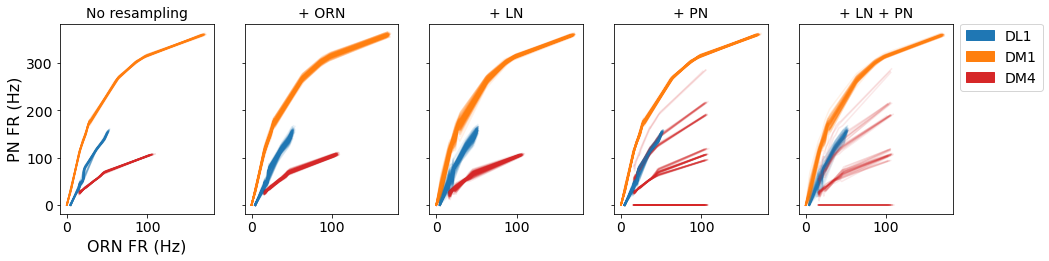

In [39]:
n_sets = 5

fig, axs = plt.subplots(1, n_sets, figsize=(16,3.5), sharex=True, sharey=True)
for i in range(n_sets):
    cur_set = all_set_glom_tables[i]
    for run in cur_set:
        cur_glom_orn_table = run[0]
        cur_glom_pn_table = run[1]
        
        for gj in range(len(gs)):
            g = gs[gj]
            ovals = cur_glom_orn_table.loc[g, odor_names].values
            pvals = cur_glom_pn_table.loc[g, odor_names].values
            o_ordering = np.argsort(ovals)

            axs[i].plot(ovals[o_ordering], pvals[o_ordering], '-', c=g_cols[gj], alpha=0.1)
    
    axs[i].set_title(set_names[i])
    
axs[0].set_xlabel('ORN FR (Hz)')
axs[0].set_ylabel('PN FR (Hz)')

axs[-1].legend(handles=patches, loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0)
plt.show()

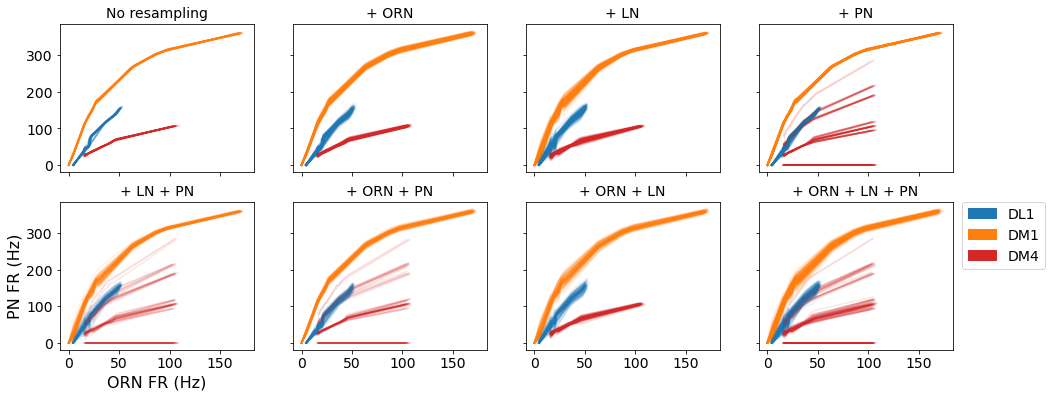

In [42]:
n_sets = 8

fig, axs = plt.subplots(2, 4, figsize=(16,6), sharex=True, sharey=True)
for i in range(n_sets):
    cur_set = all_set_glom_tables[i]
    plot_row = i // 4
    plot_col = i % 4
    for run in cur_set:
        cur_glom_orn_table = run[0]
        cur_glom_pn_table = run[1]
        
        for gj in range(len(gs)):
            g = gs[gj]
            ovals = cur_glom_orn_table.loc[g, odor_names].values
            pvals = cur_glom_pn_table.loc[g, odor_names].values
            o_ordering = np.argsort(ovals)

            axs[plot_row, plot_col].plot(ovals[o_ordering], pvals[o_ordering], '-', c=g_cols[gj], alpha=0.1)
    
    axs[plot_row, plot_col].set_title(set_names[i])
    
axs[-1, 0].set_xlabel('ORN FR (Hz)')
axs[-1, 0].set_ylabel('PN FR (Hz)')

axs[-1, -1].legend(handles=patches, loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0)
plt.show()

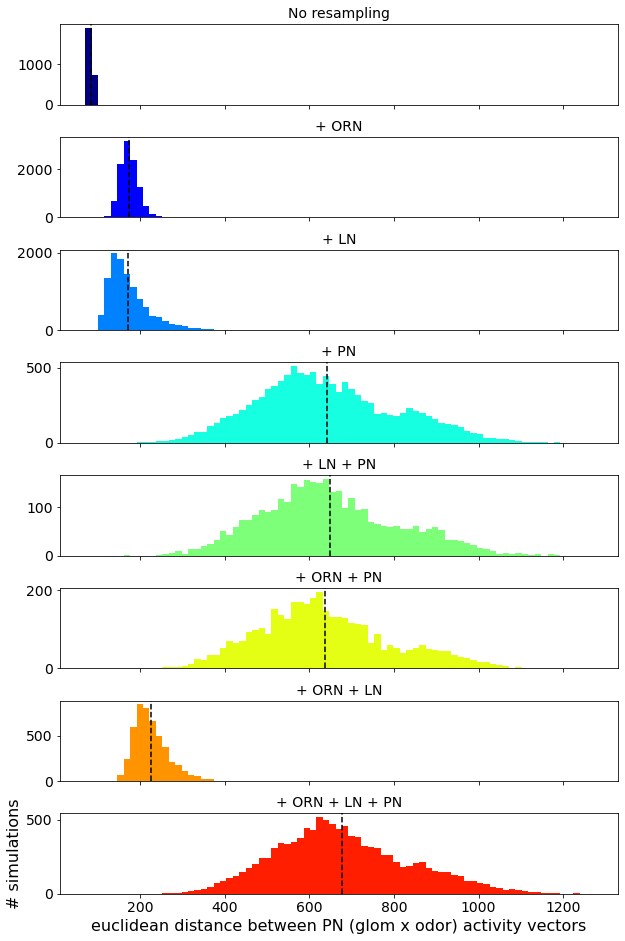

In [43]:
plot_dist_hists(pairwise_pn_glom_by_odor_activity_dists,
                set_names, dopairs=False,
                xlabel=f'{dist_metric} distance between PN (glom x odor) activity vectors',
                )

### plot firing rate activity vector pairwise distances

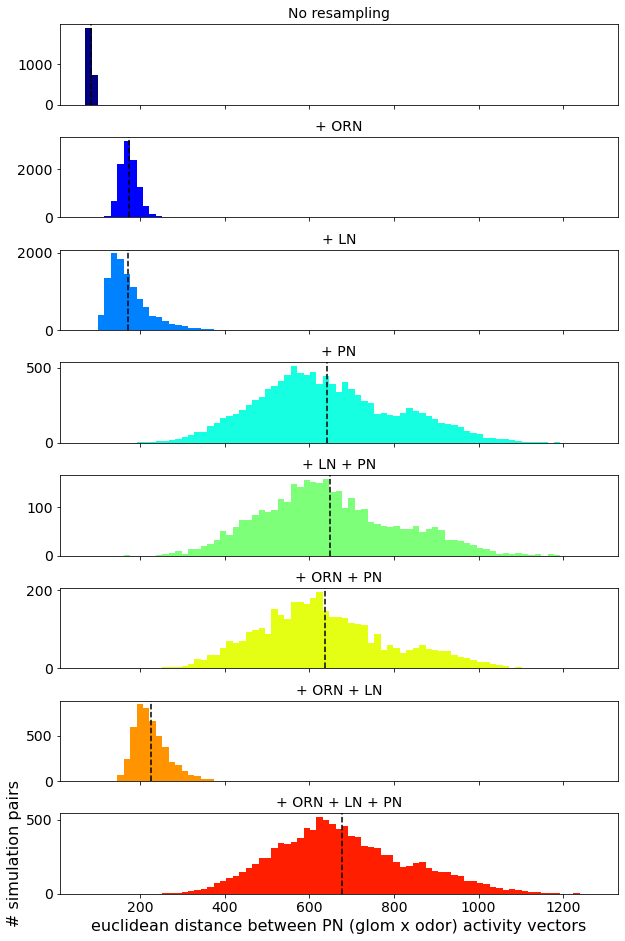

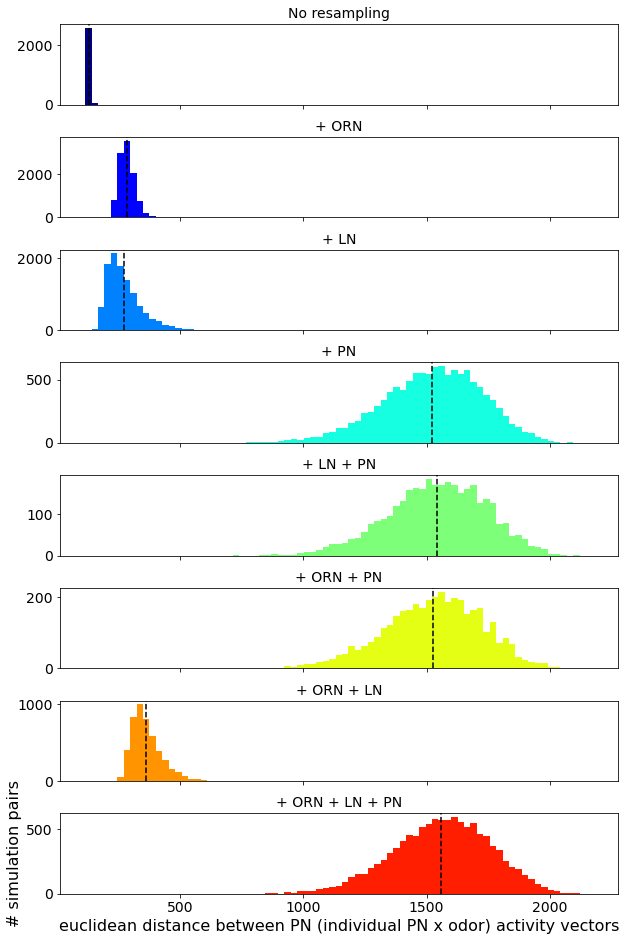

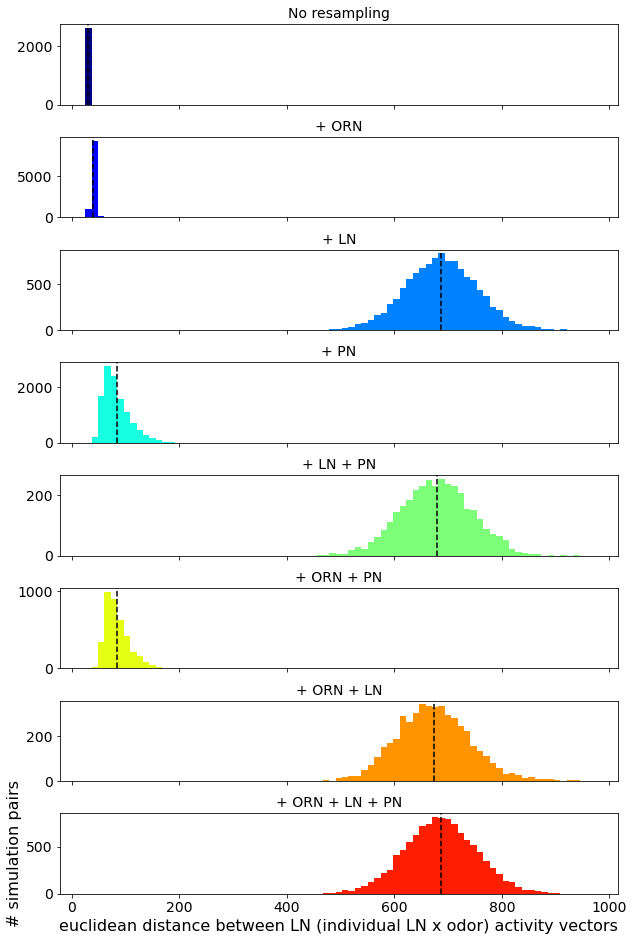

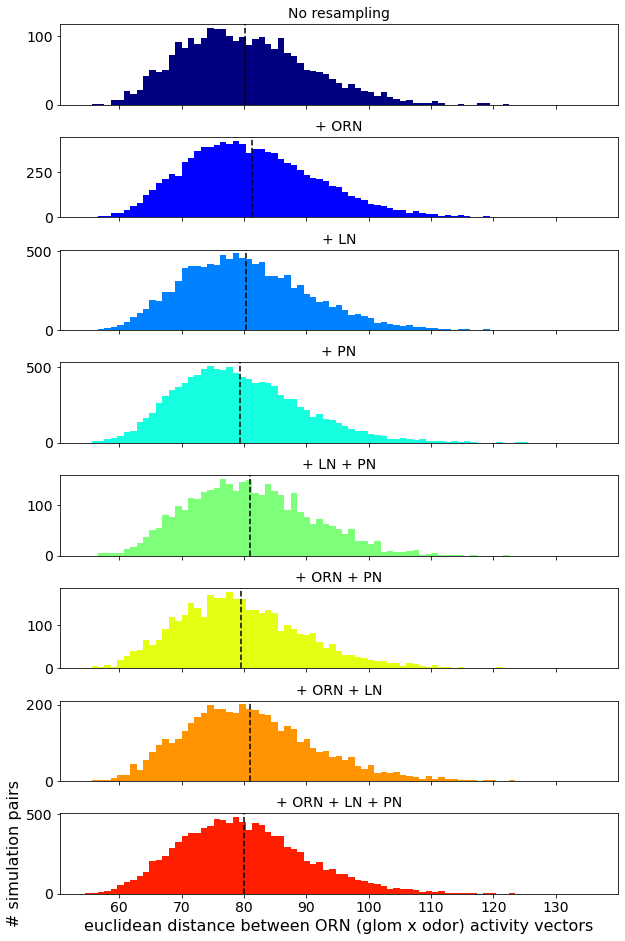

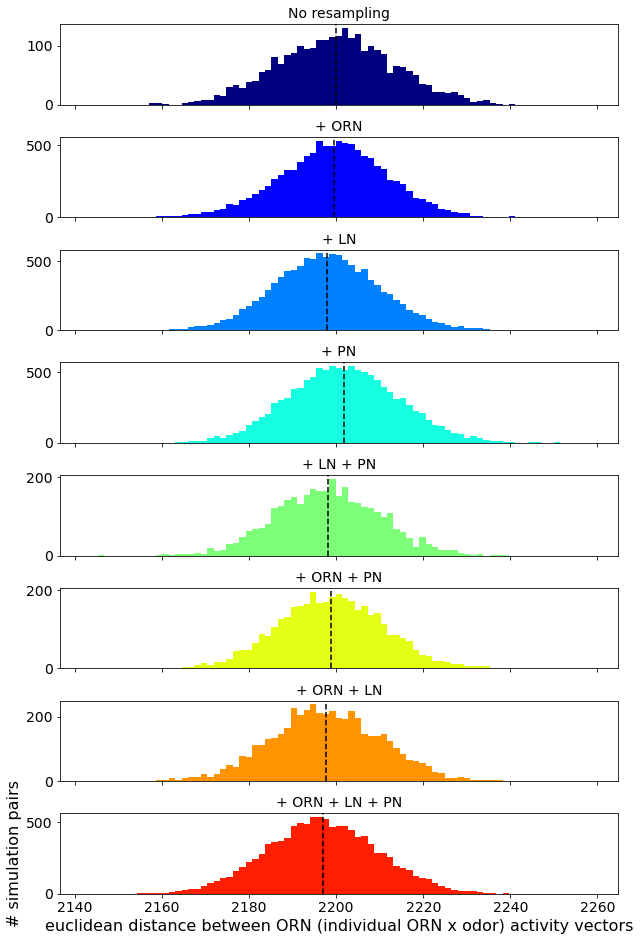

In [44]:
plot_dist_hists(pairwise_pn_glom_by_odor_activity_dists,
                set_names,
                xlabel=f'{dist_metric} distance between PN (glom x odor) activity vectors',
                figname=os.path.join(resampling_fig_dir,
                                     f'pairwise_{dist_metric}_between_PN_gxo_activity_vecs_resample5.png'))

plot_dist_hists(pairwise_pn_individ_by_odor_activity_dists,
                set_names,
                xlabel=f'{dist_metric} distance between PN (individual PN x odor) activity vectors',
                figname=os.path.join(resampling_fig_dir,
                                     f'pairwise_{dist_metric}_between_PN_pxo_activity_vecs_resample5.png'))


plot_dist_hists(pairwise_ln_individ_by_odor_activity_dists,
                set_names,
                xlabel=f'{dist_metric} distance between LN (individual LN x odor) activity vectors',
                figname=os.path.join(resampling_fig_dir,
                                     f'pairwise_{dist_metric}_between_LN_lxo_activity_vecs_resample5.png'))

plot_dist_hists(pairwise_orn_glom_by_odor_activity_dists,
                set_names,
                xlabel=f'{dist_metric} distance between ORN (glom x odor) activity vectors',
                figname=os.path.join(resampling_fig_dir,
                                     f'pairwise_{dist_metric}_between_ORN_gxo_activity_vecs_resample5.png'))

plot_dist_hists(pairwise_orn_individ_by_odor_activity_dists,
                set_names,
                xlabel=f'{dist_metric} distance between ORN (individual ORN x odor) activity vectors',
                figname=os.path.join(resampling_fig_dir,
                                     f'pairwise_{dist_metric}_between_ORN_oxo_activity_vecs_resample5.png'))

### plot input connectivity vector pairwise distances

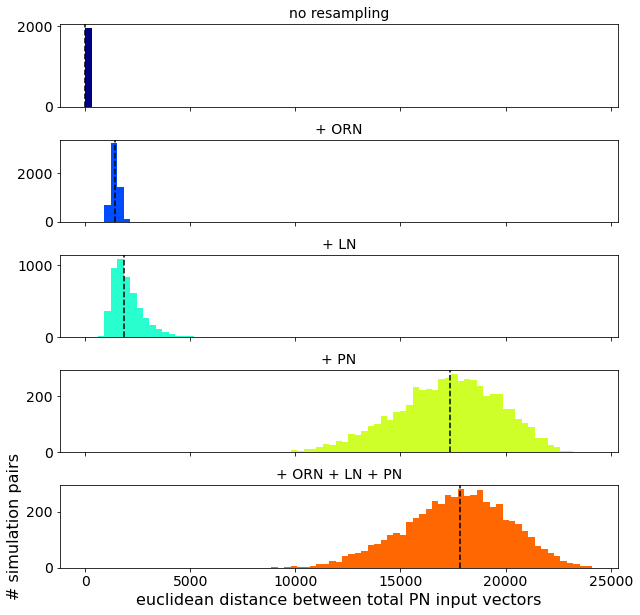

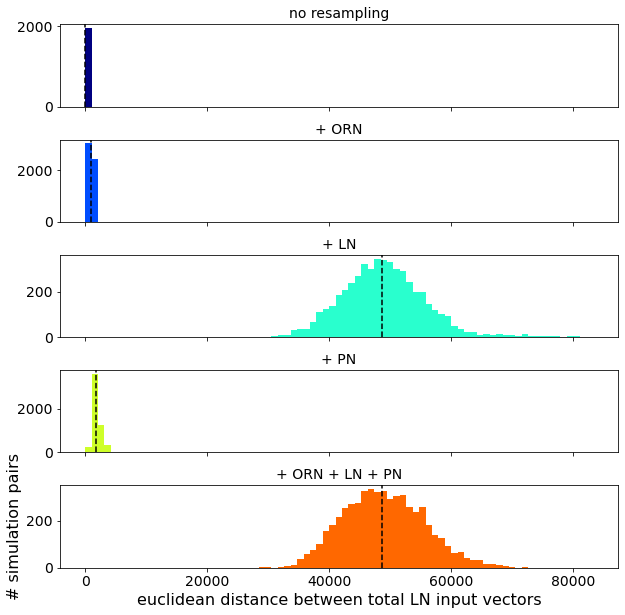

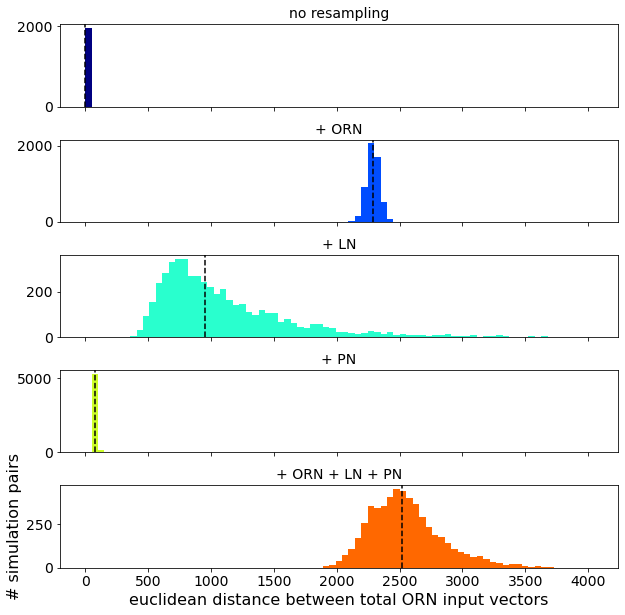

In [34]:
plot_dist_hists(pairwise_pn_input_conmat_dists,
                set_names,
                xlabel=f'{dist_metric} distance between total PN input vectors',
                figname=os.path.join(resampling_fig_dir,
                                     f'pairwise_{dist_metric}_between_conmat_PN_inputs_resample5.png'))

plot_dist_hists(pairwise_ln_input_conmat_dists,
                set_names,
                xlabel=f'{dist_metric} distance between total LN input vectors',
                figname=os.path.join(resampling_fig_dir,
                                     f'pairwise_{dist_metric}_between_conmat_LN_inputs_resample5.png'))

plot_dist_hists(pairwise_orn_input_conmat_dists,
                set_names,
                xlabel=f'{dist_metric} distance between total ORN input vectors',
                figname=os.path.join(resampling_fig_dir,
                                     f'pairwise_{dist_metric}_between_conmat_ORN_inputs_resample5.png'))

## plot activity / connectivity pairwise distances

C:\Users\dB\Anaconda3\envs\ALVar\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


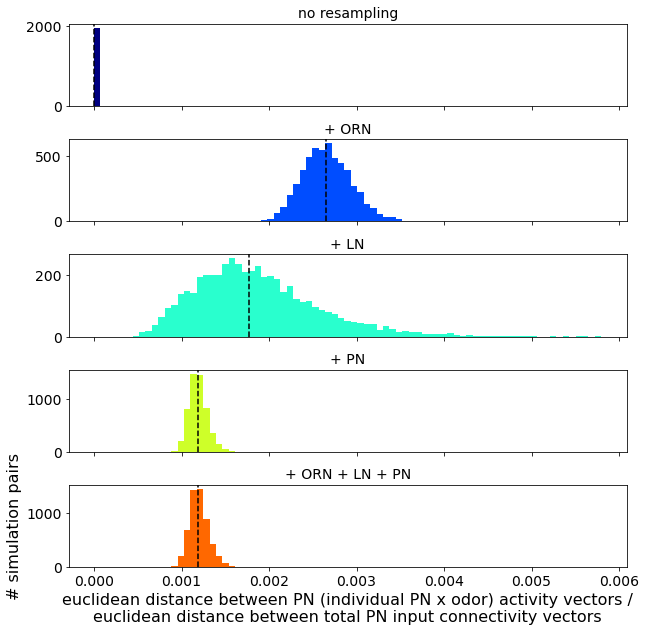

C:\Users\dB\Anaconda3\envs\ALVar\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


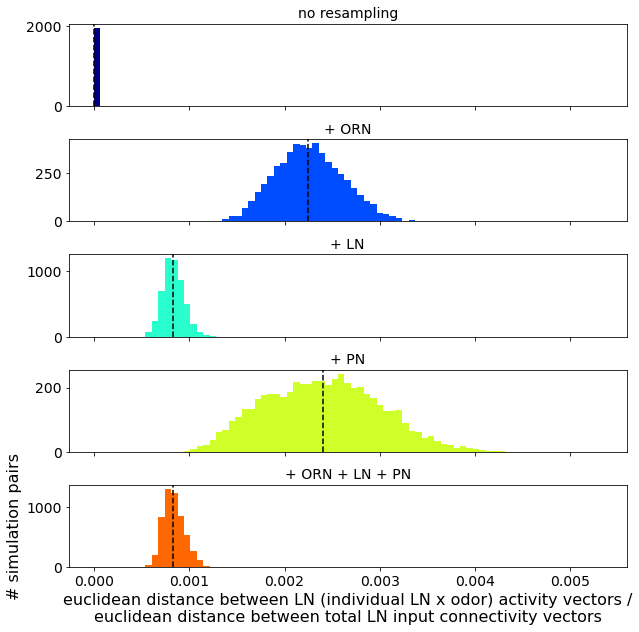

C:\Users\dB\Anaconda3\envs\ALVar\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in true_divide


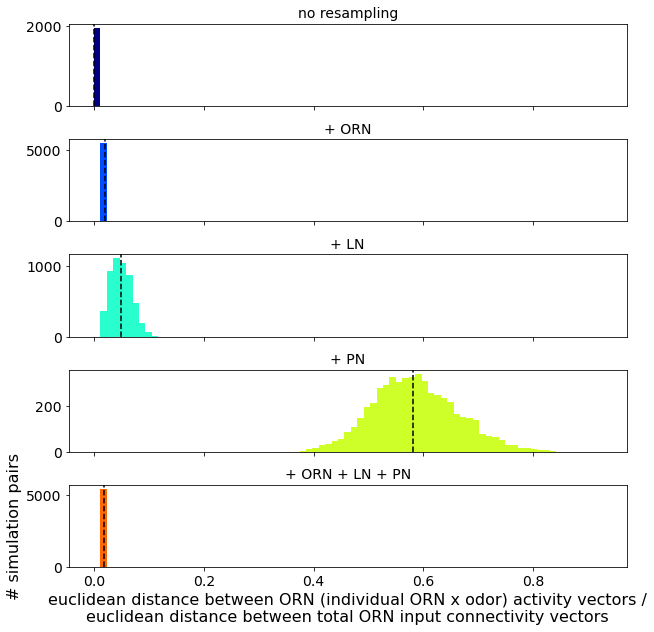

In [35]:
pn_norm_set_dists = [pairwise_pn_individ_by_odor_activity_dists[i]\
           /pairwise_pn_input_conmat_dists[i] for i in range(len(set_names))]
plot_dist_hists(pn_norm_set_dists,
                set_names,
                xlabel=f'{dist_metric} distance between PN (individual PN x odor) activity vectors /\n'+\
                    f'{dist_metric} distance between total PN input connectivity vectors',
                figname=os.path.join(resampling_fig_dir,
                                     f'pairwise_{dist_metric}_between_input_conmat_normalized_PN_activity_vecs_resample5.png'))

ln_norm_set_dists = [pairwise_ln_individ_by_odor_activity_dists[i]\
           /pairwise_ln_input_conmat_dists[i] for i in range(len(set_names))]
plot_dist_hists(ln_norm_set_dists,
                set_names,
                xlabel=f'{dist_metric} distance between LN (individual LN x odor) activity vectors /\n'+\
                    f'{dist_metric} distance between total LN input connectivity vectors',
                figname=os.path.join(resampling_fig_dir,
                                     f'pairwise_{dist_metric}_between_input_conmat_normalized_LN_activity_vecs_resample5.png'))

orn_norm_set_dists = [pairwise_orn_individ_by_odor_activity_dists[i]\
           /pairwise_orn_input_conmat_dists[i] for i in range(len(set_names))]
plot_dist_hists(orn_norm_set_dists,
                set_names,
                xlabel=f'{dist_metric} distance between ORN (individual ORN x odor) activity vectors /\n'+\
                    f'{dist_metric} distance between total ORN input connectivity vectors',
                figname=os.path.join(resampling_fig_dir,
                                     f'pairwise_{dist_metric}_between_input_conmat_normalized_ORN_activity_vecs_resample5.png'))

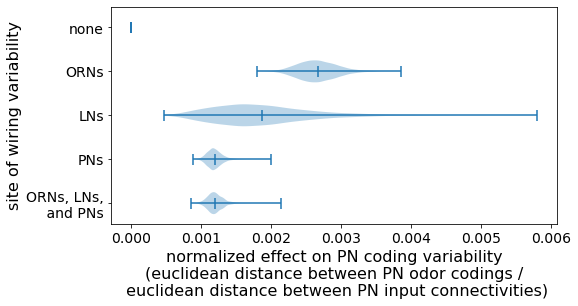

In [37]:
vec = pn_norm_set_dists
which_i = [0, 1, 2, 3, 4][::-1]

labs = ['none',
        'ORNs',
        'LNs', 
        'PNs',
        'ORNs, LNs,\n and PNs'
       ][::-1]
plt.figure(figsize=(8,4))
plt.violinplot([vec[i] for i in which_i], showmeans=True, vert=False)
plt.yticks(1+np.arange(len(which_i)), labs)#, ha='right', rotation=30)
plt.ylabel('site of wiring variability')
plt.xlabel('normalized effect on PN coding variability\n(euclidean distance between PN odor codings /\n euclidean distance between PN input connectivities)')
#plt.savefig('ln_effect_fin.png', dpi=800, bbox_inches='tight')
plt.show()

In [28]:
foo

NameError: name 'foo' is not defined

In [ ]:
foo

In [ ]:
## identify sets in tails

In [ ]:
def get_i_j_from_pairwise_pos(pos_in_pdist, n):
    '''
    # testing
    dat = np.random.normal(0, 1, (13, 80))
    my_pdists = pdist(dat, metric=dist_metric)
    for jk in np.arange(78):
        i_order, j_order = get_i_j_from_pairwise_pos(jk, 13)
        print(my_pdists[jk] == pdist(dat[[i_order, j_order], :], metric=dist_metric)[0])
    '''
    try_pos = 0; i_order = 0; j_order = 0
    while(True):
        addition = n - 1 - i_order
        if try_pos + addition > pos_in_pdist:
            break
        else:
            try_pos += addition
            i_order += 1
    j_order = pos_in_pdist - try_pos + i_order + 1
    return i_order, j_order

In [ ]:
list_of_set_dists = [pairwise_dists[i]/pairwise_conmat_dists[i] for i in range(len(set_names))]
for l in list_of_set_dists:
    l[np.isinf(l)] = 0 # np.nan


min_dist = np.min([np.nanmin(x) for x in list_of_set_dists])
max_dist = np.max([np.nanmax(x) for x in list_of_set_dists])

b = np.linspace(min_dist, max_dist, 80)

cmap = cm.get_cmap('jet')

fig, axs = plt.subplots(8, 1, figsize=(10,16), sharex=True)
for i in range(len(list_of_set_dists)):
    axs[i].hist(list_of_set_dists[i], label=set_names[i], color=cmap(i/8), bins=b)
    axs[i].axvline(np.mean(list_of_set_dists[i]), ls='--', c='k')
    axs[i].set_title(set_names[i])
    #axs[i].legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)
#plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)
plt.subplots_adjust(hspace=0.4)
plt.ylabel('# simulation pairs')
plt.xlabel(f'{dist_metric} distance between PN activity vectors /\n{dist_metric} distance between total PN input vectors')
#plt.suptitle('pairwise distances between (glom x odor) mean PN firing rate vectors', y=0.93)
plt.savefig(f'hist_divide_activity_distance_by_synapse_distance_resample5.png', dpi=400, bbox_inches='tight')
plt.show()

In [ ]:
pairwise_conmat_dists

In [ ]:
pairwise_dists

In [ ]:
from scipy import stats

In [ ]:
cmap = cm.get_cmap('jet')

reord = [0,1,2,3,7,6,4,5]

fig, axs = plt.subplots(4, 2, figsize=(12,20), sharex=True, sharey=True)
for i in range(len(set_names)):
    axs[i%4, int(i>=4)].scatter(pairwise_conmat_dists[reord[i]], pairwise_dists[reord[i]], 
                   alpha=0.1, label=set_names[reord[i]], color='k')#cmap(reord[i]/8))
    slope, intercept, r_value, p_value, std_err = stats.linregress(pairwise_conmat_dists[reord[i]], 
                                                                   pairwise_dists[reord[i]], fit_intercept=False)
    axs[i%4, int(i>=4)].set_title(set_names[reord[i]] + ', slope: {:.2f}, r: {:.2f}'.format(slope, r_value))
    
    
    
    #axs[i%4, int(i>=4)].axis('square')
    #axs[i].legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)
#plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)
#plt.subplots_adjust(hspace=0.4)
axs[-1][0].set_ylabel('distance between PN activity vectors')
axs[-1][0].set_xlabel('distance between PN input synapse vectors')
#plt.xlabel(f'{dist_metric} distance')
#plt.suptitle('pairwise distances between (glom x odor) mean PN firing rate vectors', y=0.93)
#plt.savefig(f'scatter_PN_activity_vs_conmat_PN_inputs_resample5.png', dpi=400, bbox_inches='tight')
plt.show()

In [ ]:
cmap = cm.get_cmap('jet')

for i in range(len(set_names)):
    plt.figure(figsize=(6,6))
    plt.scatter(pairwise_conmat_dists[i], pairwise_dists[i], 
                   alpha=0.6, label=set_names[i], color=cmap(i/8))
    plt.title(set_names[i])
    plt.show()
    #axs[i].legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)
#plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)
#plt.subplots_adjust(hspace=0.4)
#plt.ylabel('# simulation pairs')
#plt.xlabel(f'{dist_metric} distance')
#plt.suptitle('pairwise distances between (glom x odor) mean PN firing rate vectors', y=0.93)
#plt.savefig(f'pairwise_{dist_metric}_between_vectors_resample5.png', dpi=400, bbox_inches='tight')

In [ ]:

        ind_al_block = al_block.copy().loc[ind_df_bodyIds, ind_df_bodyIds]
    

In [ ]:
list_of_pn_glom_tensors_good_set[0].shape

In [ ]:
[x.shape for x in list_of_pn_glom_tensors_good_set]

In [ ]:
tensor_stds = [np.std(cur_tensor, 2) for cur_tensor in list_of_pn_glom_tensors_good_set]
tensor_means = [np.mean(cur_tensor, 2) for cur_tensor in list_of_pn_glom_tensors_good_set]
tensor_cvs = [tensor_stds[i]/tensor_means[i]for i in range(len(list_of_pn_glom_tensors_good_set))]

In [ ]:
plt.figure(figsize=(12,8))
b = np.linspace(0, 6, 100)
plt.hist(tensor_cvs[1].flatten(), label='ORN', alpha=0.6, bins=b)
plt.hist(tensor_cvs[2].flatten(), label='LN', alpha=0.6, bins=b)
plt.hist(tensor_cvs[3].flatten(), label='PN', alpha=0.6, bins=b)
plt.hist(tensor_cvs[0].flatten(), label='None', alpha=0.6, bins=b)
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)
plt.show()

In [ ]:
cmap = cm.get_cmap('jet')

In [ ]:
list_of_arrays = [x.flatten() for x in tensor_stds]
min_dist = np.min([np.nanmin(x) for x in list_of_arrays])
max_dist = np.max([np.nanmax(x) for x in list_of_arrays])
b = np.linspace(min_dist, max_dist, 100)

fig, axs = plt.subplots(8, 1, figsize=(8,9), sharex=True)
for i in range(8):
    axs[i].hist(list_of_arrays[i], color=cmap(i/8), bins=b)
    axs[i].set_ylabel(set_names[i], rotation=0, ha='right')
plt.show()

In [ ]:
dist_metric = 'euclidean'

pairwise_dists = []
for t in list_of_pn_glom_tensors_good_set:
    #t = t[:75, :, :]
    nsim_in_t, nglom, nodors = t.shape
    t_pdists = pdist(t.reshape((nsim_in_t, nglom*nodors)), metric=dist_metric)
    pairwise_dists.append(t_pdists)

In [ ]:
min_dist = np.min([np.nanmin(x) for x in pairwise_dists])
max_dist = np.max([np.nanmax(x) for x in pairwise_dists])

b = np.linspace(min_dist, max_dist, 80)

cmap = cm.get_cmap('jet')

fig, axs = plt.subplots(8, 1, figsize=(10,16), sharex=True)
for i in range(len(list_of_pn_glom_tensors_good_set)):
    axs[i].hist(pairwise_dists[i], label=set_names[i], color=cmap(i/8), bins=b)
    axs[i].axvline(np.mean(pairwise_dists[i]), ls='--', c='k')
    axs[i].set_title(set_names[i])
    #axs[i].legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)
#plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)
plt.subplots_adjust(hspace=0.4)
plt.ylabel('# simulation pairs')
plt.xlabel(f'{dist_metric} distance')
plt.suptitle('pairwise distances between (glom x odor) mean PN firing rate vectors', y=0.93)
plt.savefig(f'pairwise_{dist_metric}_between_vectors_resample5.png', dpi=400, bbox_inches='tight')
plt.show()

In [ ]:
set_names

In [ ]:
new_set_names = ['no resampling',
 'resampled ORNs',
 'resampled LNs',
 'resampled PNs',
 '+ LN + PN',
 '+ ORN + PN',
 '+ ORN + LN',
 'resampled ORNs, LNs, PNs']



min_dist = np.min([np.nanmin(x) for x in pairwise_dists])
max_dist = np.max([np.nanmax(x) for x in pairwise_dists])

b = np.linspace(min_dist, max_dist, 80)

mini_set = [0,1,2,3,7]
nplots = len(mini_set)

cmap = cm.get_cmap('jet')

fig, axs = plt.subplots(5, 1, figsize=(8,8), sharex=True)
for i_i in range(5):
    i = mini_set[i_i]
    axs[i_i].hist(pairwise_dists[i], label=new_set_names[i], color=cmap(i_i/8), bins=b)
    axs[i_i].axvline(np.mean(pairwise_dists[i]), ls='--', c='k')
    axs[i_i].set_title(new_set_names[i])
    #axs[i].legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)
#plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)
plt.subplots_adjust(hspace=0.4)
plt.ylabel('# pairs')
plt.xlabel(f'{dist_metric} distance')
#plt.suptitle('pairwise distances between (glom x odor) mean PN firing rate vectors', y=0.93)
plt.savefig(f'pairwise_dists_resample5_mini.pdf', dpi=400, bbox_inches='tight')
plt.show()

In [1]:
new_set_names = ['no resampling',
 'resampled ORNs',
 'resampled LNs',
 'resampled PNs',
# '+ LN + PN',
# '+ ORN + PN',
# '+ ORN + LN',
 'resampled ORNs, LNs, PNs']



min_dist = np.min([np.nanmin(x) for x in pairwise_dists])
max_dist = np.max([np.nanmax(x) for x in pairwise_dists])

b = np.linspace(min_dist, max_dist, 80)

mini_set = [0,1,2,3,7]
nplots = len(mini_set)

cmap = cm.get_cmap('jet')

fig, axs = plt.subplots(5, 1, figsize=(8,8), sharex=True)
for i_i in range(5):
    i = mini_set[i_i]
    axs[i_i].hist(pairwise_dists[i], label=new_set_names[i], color=cmap(i_i/8), bins=b)
    axs[i_i].axvline(np.mean(pairwise_dists[i]), ls='--', c='k')
    axs[i_i].set_title(new_set_names[i])
    #axs[i].legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)
#plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)
plt.subplots_adjust(hspace=0.4)
plt.ylabel('# pairs')
plt.xlabel(f'{dist_metric} distance')
#plt.suptitle('pairwise distances between (glom x odor) mean PN firing rate vectors', y=0.93)
plt.savefig(f'pdists_resample5_mini.png', dpi=400, bbox_inches='tight')
plt.show()

NameError: name 'np' is not defined

In [ ]:
d_uPN_out = pickle.load(open('pairwise_dists_resample5_uPN_out.p', 'rb'))
d_LN_thermo = pickle.load(open('pairwise_dists_resample5_LN_thermo_extreme.p', 'rb'))

d_uPN_out['set_names'], d_LN_thermo['set_names']

In [ ]:
combined_pairwise_dists = pairwise_dists[:4] \
    + d_uPN_out['dists'] \
    + pairwise_dists[4:] \
    + d_LN_thermo['dists']

combined_set_names = set_names[:4] + \
    ['+ uPN; fixed uPN$\\rightarrow$ORN',
     '+ uPN; fixed uPN$\\rightarrow$LN',
     '+ uPN; fixed uPN$\\rightarrow$uPN',
     '+ uPN; fixed uPN$\\rightarrow$mPN'] + \
    set_names[4:] + \
    ['+ ORN + LN + PN; ++ sensitivity LNs', 
     '+ ORN + LN + PN; -- sensitivity LNs', ]

In [ ]:
min_dist = np.min([np.nanmin(x) for x in combined_pairwise_dists])
max_dist = np.max([np.nanmax(x) for x in combined_pairwise_dists])

b = np.linspace(min_dist, max_dist, 80)

cmap = cm.get_cmap('jet')

nplots = len(combined_pairwise_dists)
fig, axs = plt.subplots(nplots, 1, figsize=(10,2*nplots), sharex=True)
for i in range(nplots):
    axs[i].hist(combined_pairwise_dists[i], label=combined_set_names[i], color=cmap(i/nplots), bins=b)
    axs[i].axvline(np.mean(combined_pairwise_dists[i]), ls='--', c='k')
    axs[i].set_title(combined_set_names[i])
    #axs[i].legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)
#plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)
plt.subplots_adjust(hspace=0.4)
plt.ylabel('# simulation pairs')
plt.xlabel(f'{dist_metric} distance')
plt.suptitle('pairwise distances between (glom x odor) mean PN firing rate vectors', y=0.91)
plt.savefig(f'pairwise_{dist_metric}_between_vectors_resample5_combined.png', dpi=400, bbox_inches='tight')
plt.show()

In [ ]:
len(combined_pairwise_dists)

In [ ]:
foo

In [ ]:
min_dist = np.min([np.nanmin(x) for x in combined_pairwise_dists])
max_dist = np.max([np.nanmax(x) for x in combined_pairwise_dists])

b = np.linspace(min_dist, max_dist, 80)

cmap = cm.get_cmap('jet')


mini_set = [0,1,2,3,4]
nplots = len(mini_set)
fig, axs = plt.subplots(nplots, 1, figsize=(10,2*nplots), sharex=True)

for i in mini_set:
    axs[i].hist(combined_pairwise_dists[i], label=combined_set_names[i], color=cmap(i/nplots), bins=b)
    axs[i].axvline(np.mean(combined_pairwise_dists[i]), ls='--', c='k')
    axs[i].set_title(combined_set_names[i])
    #axs[i].legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)
#plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)
plt.subplots_adjust(hspace=0.4)
plt.ylabel('# simulation pairs')
plt.xlabel(f'{dist_metric} distance')
plt.suptitle('pairwise distances between (glom x odor) mean PN firing rate vectors', y=0.91)
#plt.savefig(f'pairwise_{dist_metric}_between_vectors_resample5_combined_mini.png', dpi=400, bbox_inches='tight')
plt.show()

In [ ]:
all_good_sims = np.concatenate(list_of_sets_good_sims)
all_good_sims_short_names = np.concatenate([[set_names[i]]*len(list_of_sets_good_sims[i])\
                                            for i in range(len(list_of_sets_good_sims))])

In [ ]:
odor_names = ['methyl salicylate', 
    '3-methylthio-1-propanol', 
    '1-butanol',
    '2,3-butanedione',
    '4-methylphenol',
    'isopentyl acetate']

In [ ]:
all_tabs = []
for k in all_good_sims:
    d_ind_sim = d_sims[k]

    df_AL_activity = d_ind_sim['df_AL_activity']
    
    df_orn_activity = df_AL_activity.loc[df_AL_activity.neur_type == 'ORN'].set_index('neur_name')
    df_orn_frs = df_orn_activity.loc[:, (df_orn_activity.columns.str.contains('dur')) | 
                                        (df_orn_activity.columns.str.contains('glom')) ]
    df_orn_frs.columns = odor_names + ['glom']

    df_upn_activity = df_AL_activity.loc[df_AL_activity.neur_type2 == 'uPN'].set_index('neur_name')
    df_upn_frs = df_upn_activity.loc[:, (df_upn_activity.columns.str.contains('dur')) | 
                                        (df_upn_activity.columns.str.contains('glom')) ]
    df_upn_frs.columns = odor_names + ['glom']

    max_fr = max(np.max(np.max(df_orn_frs[odor_names])), np.max(np.max(df_upn_frs[odor_names])))
    
    df_orn_frs_mean_glom = df_orn_frs.groupby('glom').mean()
    gloms_sorted_by_sum_orn_fr = df_orn_frs_mean_glom.sum(1).sort_values(ascending=False).index.values
    df_orn_frs_mean_glom = df_orn_frs_mean_glom.loc[gloms_sorted_by_sum_orn_fr]
    df_orn_frs_std_glom = df_orn_frs.groupby('glom').std().loc[gloms_sorted_by_sum_orn_fr]

    df_upn_frs_mean_glom = df_upn_frs.groupby('glom').mean().loc[gloms_sorted_by_sum_orn_fr]
    df_upn_frs_std_glom = df_upn_frs.groupby('glom').std().loc[gloms_sorted_by_sum_orn_fr]

    df_orn_frs_CV_glom = df_orn_frs_std_glom / df_orn_frs_mean_glom
    df_upn_frs_CV_glom = df_upn_frs_std_glom / df_upn_frs_mean_glom
    
    all_tabs.append(df_upn_frs_mean_glom)

In [ ]:
len(all_tabs)

In [ ]:
df_ex_odor_sims = []
for i in range(len(all_good_sims)):
    sim_name = 'sim_'+all_good_sims_short_names[i][-8:]
    #ex_odor_row = all_tabs[i][ex_odor]
    ex_odor_row = pd.Series(all_tabs[i].T.values.flatten())
    ex_odor_row = (all_tabs[i]
                   .reset_index()
                   .melt('glom', 
                         var_name='odor', 
                         value_name=all_good_sims_short_names[i])
                   .sort_values('odor')
                   .set_index(['odor', 'glom'])
                  )
    ex_odor_row.name = all_good_sims_short_names[i]
    df_ex_odor_sims.append(ex_odor_row)
df_ex_odor_sims = pd.concat(df_ex_odor_sims, 1, sort=False).T

In [ ]:
gloms_ordered_by_mean_odor_FR = df_ex_odor_sims.T.reset_index().groupby('glom').mean().mean(1).sort_values(ascending=False).index.values

In [ ]:
df_ex_ordered = df_ex_odor_sims.copy().T.reset_index()
df_ex_ordered.glom = pd.Categorical(df_ex_ordered.glom, categories=gloms_ordered_by_mean_odor_FR, ordered=True)
df_ex_ordered = df_ex_ordered.sort_values(['odor', 'glom']).set_index(['odor', 'glom']).T

In [ ]:
plt.figure(figsize=(20,8))
sns.heatmap(df_ex_ordered, vmax=max_fr,
            fmt='.0f', cmap='viridis', vmin=0, cbar_kws={'label': 'firing rate (Hz)'})
plt.title('glomerulus-average PN firing rate during {}')
plt.show()

In [ ]:
fig, axs = plt.subplots(8, 1, figsize=(20,20))

cbar_ax = fig.add_axes([.91, .4, .03, .4])

for i in range(8):
    cur_set_name = set_names[i]
    cur_df = df_ex_ordered.loc[cur_set_name]
    sns.heatmap(cur_df, vmax=max_fr, ax=axs[i], cbar_ax=cbar_ax,
                cmap='viridis', vmin=0, cbar_kws={'label': 'firing rate (Hz)'})
    axs[i].set_ylabel(cur_set_name, rotation=0, ha='right')
    axs[i].set_yticks([]); 
    if i < 7:
        axs[i].set_xticks([]); axs[i].set_xlabel('')

plt.subplots_adjust(hspace=0.04)
plt.suptitle('(glom x odor)-dimensional mean PN firing rate vectors, by resampling condition', y=0.91)
plt.savefig('pn_vectors_by_resampling_condition_resample5.png', dpi=400, bbox_inches='tight')
plt.show()

### Vector normalization

In [ ]:
row_means = df_ex_ordered.mean(1)
row_stds = df_ex_ordered.std(1)
df_ex_ordered_rowZ = (df_ex_ordered.T - row_means).T
df_ex_ordered_rowZ = (df_ex_ordered_rowZ.T / row_stds).T

In [ ]:
(df_ex_ordered_rowZ**2).sum(1)

In [ ]:
vec = row_means

min_val = np.min(vec); max_val = np.max(vec)
b = np.linspace(min_val, max_val, 80)

cmap = cm.get_cmap('jet')

nplots = len(set_names)
fig, axs = plt.subplots(nplots, 1, figsize=(10,2*nplots), sharex=True)
for i in range(nplots):
    axs[i].hist(vec.loc[set_names[i]].values, label=set_names[i], color=cmap(i/nplots), bins=b)
    axs[i].axvline(np.mean(vec.loc[set_names[i]]), ls='--', c='k')
    axs[i].set_title(set_names[i])
    #axs[i].legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)
#plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)
plt.subplots_adjust(hspace=0.4)
plt.ylabel('# simulations')
plt.xlabel(f'firing rate (Hz)')
plt.suptitle('row-wise mean per resampling class', y=0.93)
plt.show()

In [ ]:
df_ex_ordered_rowZ

In [ ]:
dist_metric = 'euclidean'

pairwise_dists_from_df_ordered_rowZ = []
for i in range(8):
    cur_set_name = set_names[i]
    cur_df = df_ex_ordered_rowZ.loc[cur_set_name]
    cur_df_pdists = pdist(cur_df.values, metric=dist_metric)
    pairwise_dists_from_df_ordered_rowZ.append(cur_df_pdists)

In [ ]:
pairwise_dists = pairwise_dists_from_df_ordered_rowZ

min_dist = np.min([np.nanmin(x) for x in pairwise_dists])
max_dist = np.max([np.nanmax(x) for x in pairwise_dists])
b = np.linspace(min_dist, max_dist, 80)

cmap = cm.get_cmap('jet')

nplots = len(set_names)
fig, axs = plt.subplots(nplots, 1, figsize=(10,16), sharex=True)
for i in range(nplots):
    axs[i].hist(pairwise_dists[i], label=set_names[i], color=cmap(i/nplots), bins=b)
    axs[i].axvline(np.mean(pairwise_dists[i]), ls='--', c='k')
    axs[i].set_title(set_names[i])
plt.subplots_adjust(hspace=0.4)
plt.ylabel('# simulation pairs')
plt.xlabel(f'{dist_metric} distance')
plt.suptitle('pairwise distances between (glom x odor) Z-scored mean PN firing rate vectors', y=0.93)
plt.savefig(f'pairwise_{dist_metric}_between_vectors_rowZ_resample5.png', dpi=400, bbox_inches='tight')
plt.show()

In [ ]:
fig, axs = plt.subplots(8, 1, figsize=(20,20))

cbar_ax = fig.add_axes([.91, .4, .03, .4])

for i in range(8):
    cur_set_name = set_names[i]
    cur_df = df_ex_ordered_rowZ.loc[cur_set_name]
    sns.heatmap(cur_df, ax=axs[i], cbar_ax=cbar_ax, center=0, #vmin=-3, vmax=3,
                cmap='bwr',  cbar_kws={'label': 'row-wise Z score'})
    axs[i].set_ylabel(cur_set_name, rotation=0, ha='right')
    axs[i].set_yticks([]); 
    #axs[i].set_xticklabels(df_ex_ordered_Z.columns, size=2, rotation=90)
    #axs[i].locator_params(nbins=cur_df.shape[1], axis='x')
    if i < 7:
        axs[i].set_xticks([]); axs[i].set_xlabel('')

plt.subplots_adjust(hspace=0.04)
plt.suptitle('(glom x odor)-dimensional Z-scored mean PN firing rate vectors, by resampling condition', y=0.91)
plt.savefig('pn_vectors_by_resampling_condition_rowZ_resample5.png', dpi=400, bbox_inches='tight')
plt.show()

In [ ]:
fig, axs = plt.subplots(8, 1, figsize=(20,20))

cbar_ax = fig.add_axes([.91, .4, .03, .4])

for i in range(8):
    cur_set_name = set_names[i]
    cur_df = df_ex_ordered_rowZ.loc[cur_set_name]
    sns.heatmap(cur_df, ax=axs[i], cbar_ax=cbar_ax, center=0, vmin=-2, vmax=2,
                cmap='bwr',  cbar_kws={'label': 'row-wise Z score'})
    axs[i].set_ylabel(cur_set_name, rotation=0, ha='right')
    axs[i].set_yticks([]); 
    #axs[i].set_xticklabels(df_ex_ordered_Z.columns, size=2, rotation=90)
    #axs[i].locator_params(nbins=cur_df.shape[1], axis='x')
    if i < 7:
        axs[i].set_xticks([]); axs[i].set_xlabel('')

plt.subplots_adjust(hspace=0.04)
plt.suptitle('(glom x odor)-dimensional Z-scored mean PN firing rate vectors, by resampling condition', y=0.91)
plt.savefig('pn_vectors_by_resampling_condition_rowZ_thresh_resample5.png', dpi=400, bbox_inches='tight')
plt.show()

In [ ]:
#df_gloms_num_neurs = pd.read_csv('df_gloms_num_neurs.csv', index_col=0)

In [ ]:
df_ex_ordered

In [ ]:
df_all = df_ex_ordered.copy().loc['+ PN']#.loc['+ ORN + LN + PN']
df_all_colZ = (df_all - df_all.mean(0))/df_all.std(0)

In [ ]:
df_all_colwise = df_all.std(0) / df_all.mean(0)
s_metric = 'CV PN firing rate'

In [ ]:
df_all_glom_odor_colwise = df_all_colwise.reset_index().pivot('odor', 'glom', 0)
df_all_glom_avg = df_all_glom_odor_colwise.mean(0)


plt.figure(figsize=(15,2))
sns.heatmap(df_all_glom_odor_colwise, annot=True, fmt='.2f', annot_kws={'fontsize': 8, 'rotation': 0},
            cmap='jet', xticklabels=True)
plt.show()

plt.figure(figsize=(15,2))
sns.heatmap(pd.DataFrame(df_all_glom_avg).T, annot=True, fmt='.2f', annot_kws={'fontsize': 8, 'rotation': 90},
            cmap='jet', xticklabels=True)
plt.show()

In [ ]:
df_all_glom_avg_num_neurs_merge = df_all_glom_avg.reset_index().merge(df_gloms_num_neurs.reset_index())

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(12,5), sharey=True)
axs[0].plot(df_all_glom_avg_num_neurs_merge['num_orns'], df_all_glom_avg_num_neurs_merge[0], 'o')
axs[1].plot(df_all_glom_avg_num_neurs_merge['num_pns'], df_all_glom_avg_num_neurs_merge[0], 'o')
axs[0].set_xlabel('# ORNs / glom'); axs[1].set_xlabel('# PNs / glom')
axs[0].set_ylabel(s_metric)
plt.show()

In [ ]:
df_all_col_CVs = df_all.std(0)
df_all_glom_odor_CVs = df_all_col_CVs.reset_index().pivot('odor', 'glom', 0)

plt.figure(figsize=(15,2))
sns.heatmap(df_all_glom_odor_CVs, cmap='jet', xticklabels=True)
plt.show()

In [ ]:
df_all_glom_odor_CVs

In [ ]:
df_all_colZ

In [ ]:
plt.figure(figsize=(20,6))
sns.heatmap(df_all_colZ, cmap='bwr', center=0, xticklabels=True)
plt.xticks(fontsize=4)
plt.show()

In [ ]:
ddf = df_ex_ordered.loc['+ PN'].iloc[:, :40]
plt.figure(figsize=(12,6))
sns.heatmap(ddf, xticklabels=True, cmap='viridis',
            cbar_kws={'label': 'mean glom PN firing rate (Hz)'})
plt.yticks([])
plt.ylabel('+ PN resample')
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
#plt.savefig('zoom_in_to_PNblock.png')
plt.show()

In [ ]:
ddf_colZ = (ddf - ddf.mean(0))/ddf.std(0)
plt.figure(figsize=(12,6))
sns.heatmap(ddf_colZ, cmap='bwr', center=0)
plt.show()

In [ ]:
ddf_colZ.mean(0)

In [ ]:
from utils.data_utils_hemi import df_char_ids

In [ ]:
'''
pairwise_dists_from_df_blockZ = []
for i in range(8):
    cur_set_name = set_names[i]
    cur_df = df_ex_ordered.loc[cur_set_name]
    cur_df_blockZ = (cur_df - cur_df.mean(0)) / cur_df.std(0)
    cur_df_blockZ_pdists = pdist(cur_df_blockZ.values, metric=dist_metric)
    pairwise_dists_from_df_blockZ.append(cur_df_blockZ_pdists)
'''

In [ ]:
#df_ex_ordered_Z = df_ex_ordered - df_ex_ordered.mean(0)
#df_ex_ordered_Z = df_ex_ordered_Z / df_ex_ordered.std(0)
#df_ex_ordered_Z

In [ ]:
fig, axs = plt.subplots(8, 1, figsize=(20,20))

cbar_ax = fig.add_axes([.91, .4, .03, .4])

for i in range(8):
    cur_set_name = set_names[i]
    cur_df = df_ex_ordered_Z.loc[cur_set_name]
    sns.heatmap(cur_df, ax=axs[i], cbar_ax=cbar_ax, center=0, vmin=-3, vmax=3,
                cmap='bwr',  cbar_kws={'label': 'row-wise Z scored firing rate (Hz)'})
    axs[i].set_ylabel(cur_set_name, rotation=0, ha='right')
    axs[i].set_yticks([]); 
    #axs[i].set_xticklabels(df_ex_ordered_Z.columns, size=2, rotation=90)
    #axs[i].locator_params(nbins=cur_df.shape[1], axis='x')
    if i < 7:
        axs[i].set_xticks([]); axs[i].set_xlabel('')

plt.subplots_adjust(hspace=0.04)
plt.suptitle('(glom x odor)-dimensional mean PN firing rate vectors, by resampling condition', y=0.91)
#plt.savefig('pn_vectors_by_resampling_condition_Z_scores_resample4.png', dpi=400, bbox_inches='tight')
plt.show()

In [ ]:
df_ex_ordered

In [ ]:
tt = list_of_pn_glom_tensors_good_set[0]


tt.shape

In [ ]:
tt = list_of_pn_glom_tensors_good_set[0]
nsim_in_t, nglom, nodors = tt.shape
tt_flat = tt.reshape((nsim_in_t, nglom*nodors))
tt_flat

In [ ]:
tt_flat.shape

In [ ]:
tt_flat.shape

In [ ]:
cur_set_name = set_names[0]
df_ex_ordered_Z = df_ex_ordered #- df_ex_ordered.mean(0)
#df_ex_ordered_Z = df_ex_ordered_Z / df_ex_ordered.std(0)
cur_df = df_ex_ordered_Z.loc[cur_set_name]
cur_df

In [ ]:
 tt_flat.mean(1)

In [ ]:
np.mean(tt, 1).shape

In [ ]:
dist_metric = 'euclidean'

pairwise_dists_rowZ = []
for t in list_of_pn_glom_tensors_good_set:
    #t = t[:75, :, :]
    nsim_in_t, nglom, nodors = t.shape
    t_pdists = pdist(t.reshape((nsim_in_t, nglom*nodors)), metric=dist_metric)
    pairwise_dists_rowZ.append(t_pdists)

In [ ]:
cur_df.shape[1]

In [ ]:
num_ticks = 1000
# the index of the position of yticks
xticks = np.linspace(0, cur_df.shape[1] - 1, num_ticks, dtype=np.int)
# the content of labels of these yticks
xticklabels = [cur_df.columns[idx] for idx in xticks]

plt.figure(figsize=(12,4))
ax = sns.heatmap(cur_df, center=0, vmin=-3, vmax=3, cmap='bwr', xticklabels=xticklabels)
#plt.locator_params(nbins=200, axis='x', tight=True)
ax.set_xticks(np.arange(cur_df.shape[1]))
ax.set_xticklabels(cur_df.columns, size=4)
plt.show()